In [449]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "Resources/Ucity_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data = pd.read_csv(city_data_to_load, low_memory=False)
ride_data = pd.read_csv(ride_data_to_load, low_memory=False)

# Combine the data into a single dataset
combine_data = pd.merge(ride_data, city_data, how="left", on=["city"])
# Display the data table for preview
combine_data.set_index("city")

combine_data.head()
#city_data
#ride_data


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


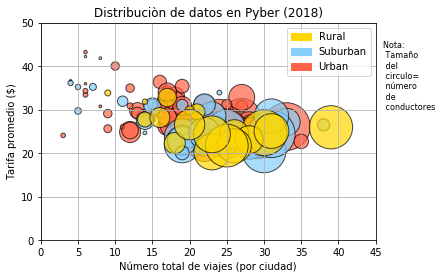

In [444]:
#--------Bubble Plot of Ride Sharing Data------------

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
x = combine_data[["type","city"]].groupby(["city"]).count()
y = combine_data[["fare","city"]].groupby(["city"]).mean()
z = combine_data[["driver_count","city"]].groupby(["city"]).sum()

# Incorporate the other graph properties
city_data.loc[city_data.type == "Suburban", "colores"] = "lightskyblue"
city_data.loc[city_data.type == "Rural", "colores"] = "gold"
city_data.loc[city_data.type == "Urban", "colores"] = "tomato"
city_data.head()

# Create a legend
plt.title("Distribuciòn de datos en Pyber (2018)")
plt.xlabel("Número total de viajes (por ciudad)")
plt.ylabel("Tarifa promedio ($)")


# Incorporate a text label regarding circle size
tomato_patch = mpatches.Patch(color='tomato', label='Urban')
gold_patch = mpatches.Patch(color='gold', label='Rural')
blue_patch = mpatches.Patch(color='lightskyblue', label='Suburban')
plt.legend(handles=[gold_patch, blue_patch,tomato_patch])

textstr = 'Nota: \n Tamaño \n del \n circulo= \n número \n de \n conductores'
plt.xlim(0, 45)
plt.ylim(0, 50)
plt.text(46, 30, textstr, fontsize=8)
plt.grid(True)

# Save Figure
plt.scatter(x,y,z,c=city_data["colores"],edgecolors="black",alpha=0.7)
plt.show()
plt.savefig("Resources/Pyber1.png")
plt.close()

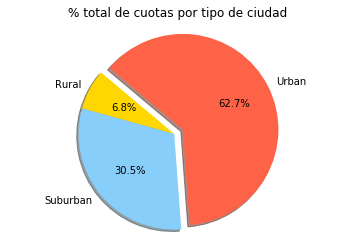

In [445]:
#--------------Total Fares by City Type------------

# Calculate Type Percents
total_fares = combine_data[["fare","type"]].groupby(["type"])
total_fares.sum()

totales= total_fares.sum()
totales.sum()

promedios = total_fares.sum() / totales.sum()
promedios

# Build Pie Chart
pies = ["Rural","Suburban","Urban"]
pie_values = promedios["fare"]
colors = ["gold", "lightskyblue","tomato"]
explode = (0, 0, 0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_values, explode=explode, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% total de cuotas por tipo de ciudad")
# Show Figure
plt.show()
# Save Figure
plt.savefig("Resources/Pyber2.png")
plt.close()

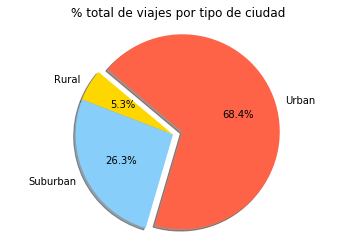

In [446]:
#-----------------Total Rides by City Type-----------------

# Calculate Ride Percents
combine_data.loc[combine_data.type == "Suburban", "num"] = 1
combine_data.loc[combine_data.type == "Urban", "num"] = 1
combine_data.loc[combine_data.type == "Rural", "num"] = 1

combine_data.head()
suma_totales = combine_data[["type","num"]].groupby(["type"]).sum()
promedios_rides = suma_totales / suma_totales.sum()
promedios_rides.head()
# Build Pie Chart

pies = ["Rural","Suburban","Urban"]
pie_values = promedios_rides["num"]
colors = ["gold", "lightskyblue","tomato"]
explode = (0, 0, 0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_values, explode=explode, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% total de viajes por tipo de ciudad")

# Save Figure
# Show Figure
plt.show()
plt.savefig("Resources/Pyber3.png")
plt.close()

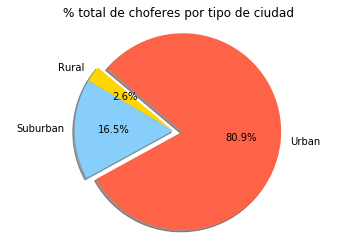

In [447]:
#--------------Total Drivers by City Type--------------------

# Calculate Driver Percents
suma_chofer = city_data[["type","driver_count"]].groupby(["type"]).sum()
suma_chofer.head()

promedios_chofer = suma_chofer / suma_chofer.sum()
promedios_chofer.head()

# Build Pie Charts
pies = ["Rural","Suburban","Urban"]
pie_values = promedios_chofer["driver_count"]
colors = ["gold", "lightskyblue","tomato"]
explode = (0, 0, 0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_values, explode=explode, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% total de choferes por tipo de ciudad")

# Save Figure
# Show Figure
plt.show()
plt.savefig("Resources/Pyber4.png")
plt.close()
